In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-diffmats-2nd)

We test first-order and second-order differentiation matrices for the function $x + \exp(\sin 4x)$ over $[-1,1]$.

In [2]:
f = lambda x: x + exp( sin(4 * x) )

For reference, here are the exact first and second derivatives.

In [3]:
df_dx = lambda x: 1 + 4 * exp(sin(4 * x)) * cos(4 * x)
d2f_dx2 = lambda x: 4 * exp(sin(4 * x)) * (4 * cos(4 * x)**2 - 4 * sin(4 * x))

We discretize on equally spaced nodes and evaluate $f$ at the nodes.

In [4]:
t, Dx, Dxx = FNC.diffmat2(12, [-1, 1])
y = f(t)

Then the first two derivatives of $f$ each require one matrix-vector multiplication.

In [5]:
yx = Dx @ y
yxx = Dxx @ y

The results show poor accuracy for this small value of $n$.

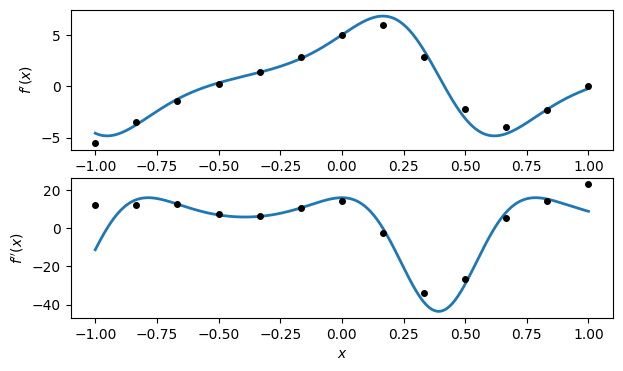

In [6]:
x = linspace(-1, 1, 500)
subplot(2, 1, 1)
plot(x, df_dx(x))
plot(t, yx, "ko")
xlabel("$x$"),  ylabel("$f'(x)$")

subplot(2, 1, 2)
plot(x, d2f_dx2(x))
plot(t, yxx, "ko")
xlabel("$x$"),  ylabel("$f''(x)$");

A convergence experiment confirms the order of accuracy. Because we expect an algebraic convergence rate, we use a log-log plot of the errors.

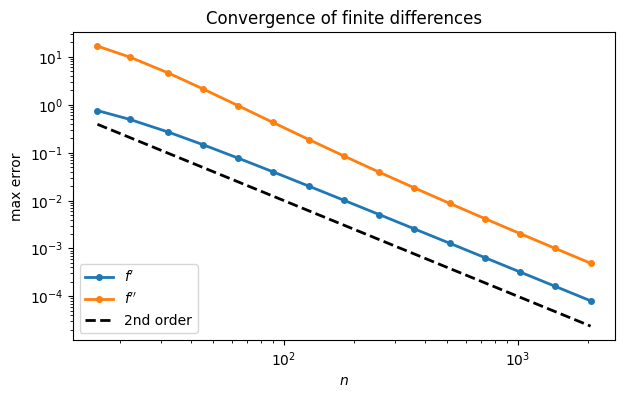

In [7]:
N = array([int(2**k) for k in arange(4, 11.5, 0.5)])
err1 = zeros(len(N))
err2 = zeros(len(N))
for k, n in enumerate(N):
    t, Dx, Dxx = FNC.diffmat2(n, [-1, 1])
    y = f(t)
    err1[k] = norm(df_dx(t) - Dx @ y, inf)
    err2[k] = norm(d2f_dx2(t) - Dxx @ y, inf)

loglog(N, err1, "-o", label="$f'$")
loglog(N, err2, "-o", label="$f''$")
plot(N, 10 * 10 / N**2, "k--", label="2nd order")
xlabel("$n$"),  ylabel("max error")
legend(loc="lower left")
title("Convergence of finite differences");